# Data@ANZ Task 1

Segment the dataset and draw unqiue insight includinging visualization of the 
transaction value and assessing the effect of any outliners

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load CSV file

In [2]:
dataset = pd.read_csv('ANZ synthesised transaction dataset.csv')

In [3]:
dataset.head(2)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit


# Exploratory Data Analysis

## Missing Data

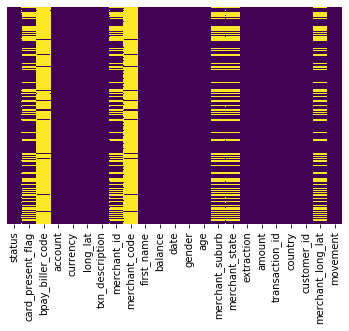

In [4]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Droping of Columns

In [5]:
dataset = dataset.drop(['currency', 'first_name', 'country', 'transaction_id', 'date', 'account', 'bpay_biller_code', 'merchant_suburb', 'merchant_id', 'merchant_code', 'long_lat', 'customer_id', 'merchant_long_lat'], axis=1)

In [6]:
dataset.head(2)

,status,card_present_flag,txn_description,balance,gender,age,merchant_state,extraction,amount,movement
0,authorized,1.0,POS,35.39,F,26,QLD,2018-08-01T01:01:15.000+0000,16.25,debit
1,authorized,0.0,SALES-POS,21.20,F,26,NSW,2018-08-01T01:13:45.000+0000,14.19,debit


# Independent Variable (Categorical)

## Status

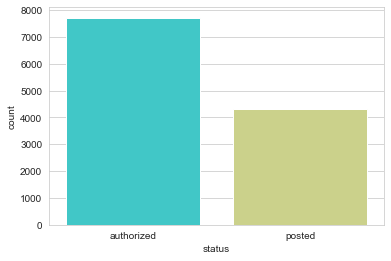

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='status', data=dataset, palette='rainbow')

## txn_description

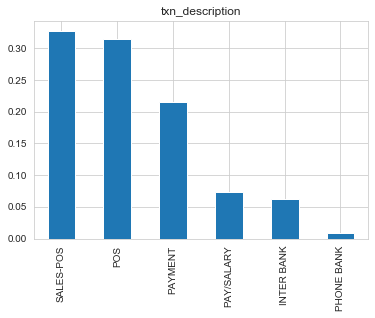

In [8]:
dataset['txn_description'].value_counts(normalize=True).plot.bar(title='txn_description') 

## card_present_flag, gender, movement

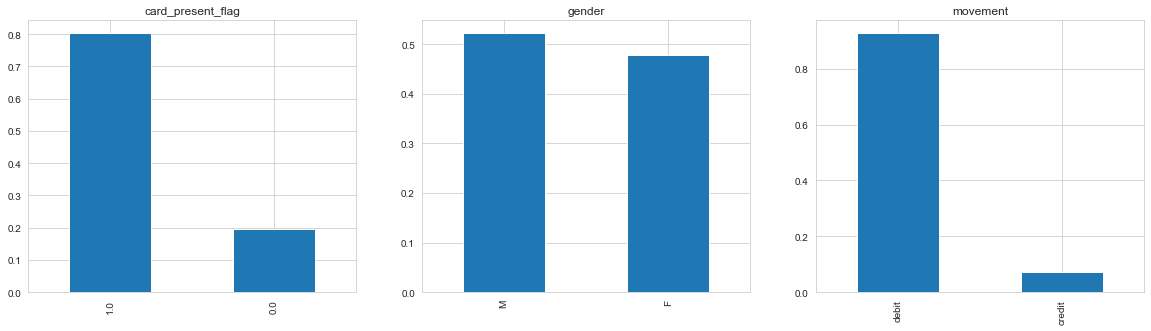

In [9]:
plt.figure(1)

#card_present_flag
plt.subplot(131) 
dataset['card_present_flag'].value_counts(normalize=True).plot.bar(figsize=(20,5), title= 'card_present_flag') 
 
#gender
plt.subplot(132)
dataset['gender'].value_counts(normalize=True).plot.bar(title= 'gender') 

#movement
plt.subplot(133) 
dataset['movement'].value_counts(normalize=True).plot.bar(title= 'movement') 
plt.show()

## merchant_state

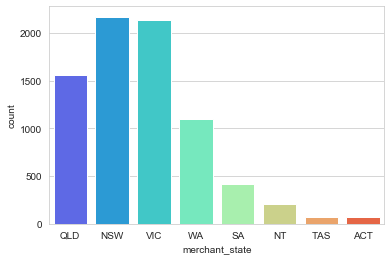

In [10]:
sns.countplot(x='merchant_state', data=dataset, palette='rainbow')

# Independent Variable (Numerical)

## balance

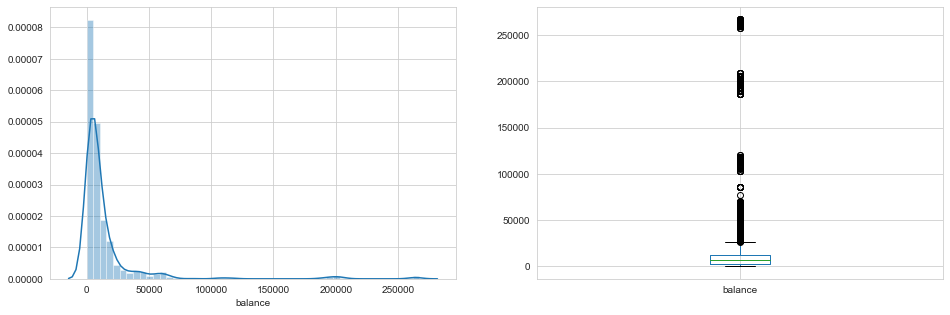

In [11]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(dataset['balance'])
plt.subplot(122) 
dataset['balance'].plot.box(figsize=(16,5)) 
plt.show()

## amount

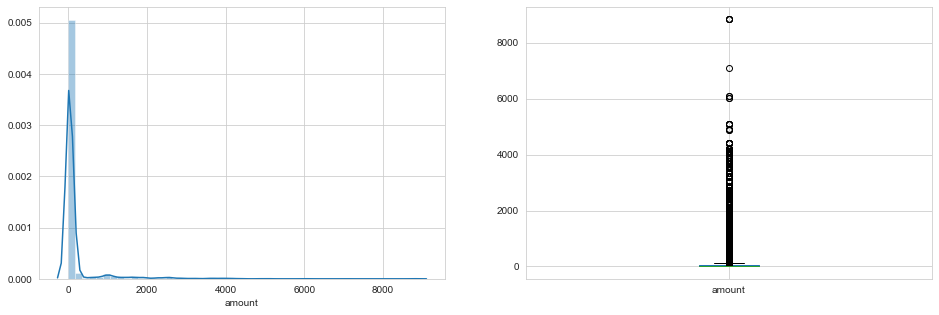

In [12]:
plt.subplot(121) 
sns.distplot(dataset['amount'])
plt.subplot(122) 
dataset['amount'].plot.box(figsize=(16,5)) 
plt.show()

## age

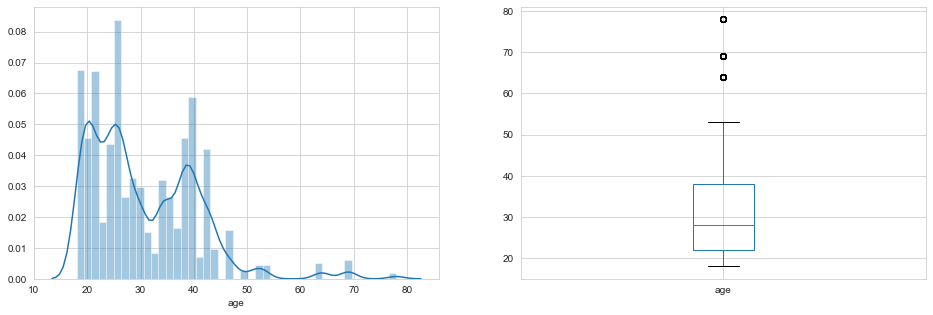

In [13]:
plt.subplot(121) 
sns.distplot(dataset['age']).figsize=(20,10)
plt.subplot(122) 
dataset['age'].plot.box(figsize=(16,5)) 
plt.show()

# Overall Insights of Data

In [14]:
dataset.head(2)

,status,card_present_flag,txn_description,balance,gender,age,merchant_state,extraction,amount,movement
0,authorized,1.0,POS,35.39,F,26,QLD,2018-08-01T01:01:15.000+0000,16.25,debit
1,authorized,0.0,SALES-POS,21.20,F,26,NSW,2018-08-01T01:13:45.000+0000,14.19,debit


In [15]:
avg_transaction = dataset['amount'].mean()
avg_transaction

187.93358797641767

In [16]:
max_transaction = dataset['amount'].max()
max_transaction

8835.98

## Working with the date column

In [17]:
type(dataset['extraction'].iloc[0])

str

In [18]:
dataset['extraction'] = pd.to_datetime(dataset['extraction'])

In [19]:
dataset['Month'] = dataset['extraction'].apply(lambda time: time.month)
dataset['Day of Week'] = dataset['extraction'].apply(lambda time: time.dayofweek)

In [20]:
dmap_days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dataset['Day of Week'] = dataset['Day of Week'].map(dmap_days)

In [21]:
dmap_months = {8:'August', 9:'September', 10:'October'}
dataset['Month'] = dataset['Month'].map(dmap_months)

## Status by Month

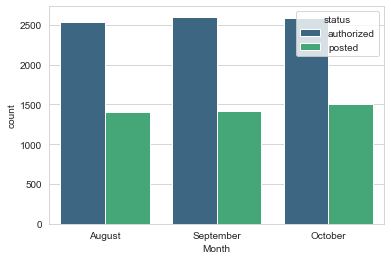

In [22]:
sns.countplot(x='Month', data=dataset, hue='status',palette='viridis')

## Status by Week

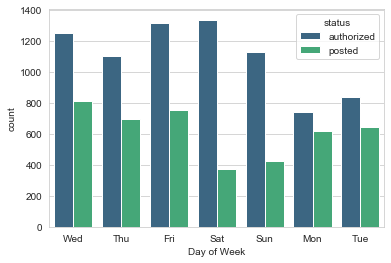

In [23]:
sns.countplot(x='Day of Week', data=dataset, hue='status',palette='viridis')

## Txn_description by Month

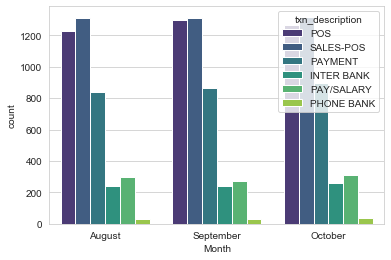

In [24]:
sns.countplot(x='Month', data=dataset, hue='txn_description', palette='viridis')

## By Month Count

In [25]:
byMonth = dataset.groupby('Month').count()
byMonth.head()

,status,card_present_flag,txn_description,balance,gender,age,merchant_state,extraction,amount,movement,Day of Week
Month,,,,,,,,,,,
August,3943,2535,3943,3943,3943,3943,2535,3943,3943,3943,3943
October,4087,2581,4087,4087,4087,4087,2581,4087,4087,4087,4087
September,4013,2601,4013,4013,4013,4013,2601,4013,4013,4013,4013


In [26]:
august_transaction = len(dataset[dataset['Month']=='August'])
september_transaction = len(dataset[dataset['Month']=='September'])
october_transaction = len(dataset[dataset['Month']=='October'])

In [27]:
august_amount = dataset[dataset['Month']=='August']['amount'].mean()
september_amount = dataset[dataset['Month']=='September']['amount'].mean()
october_amount = dataset[dataset['Month']=='October']['amount'].mean()

In [28]:
monthly_transaction = [august_transaction, september_transaction, october_transaction]
monthly_amount = [august_amount, september_amount, october_amount]

## Number of Transaction per Month

In [29]:
dataset['Month'].value_counts(normalize=True)*100

October      33.936727
September    33.322262
August       32.741011
Name: Month, dtype: float64

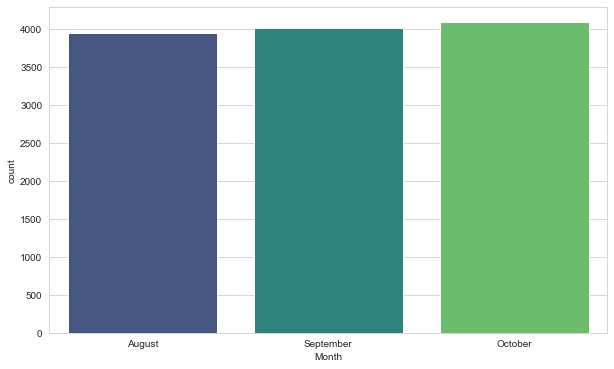

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=dataset, palette='viridis')

## Avergae Amount of Transaction Per Month

In [31]:
month = dataset['Month'].unique()

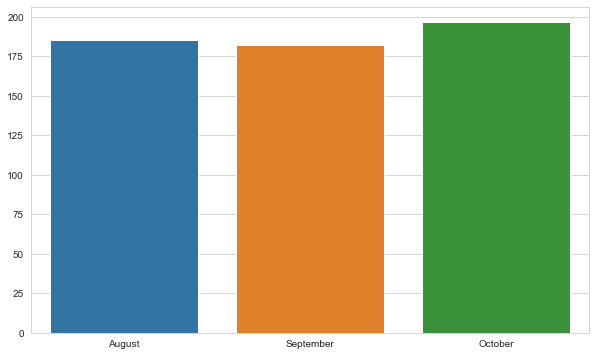

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=month, y=monthly_amount)

# THE END!!!